# Dynamics demonstration

First run the following command in the terminal to generate the data:

```bash
python -m mirrored_langevin_rnn.run configs/simulation_poisson.yaml
python -m mirrored_langevin_rnn.run configs/simulation_slam.yaml
python -m mirrored_langevin_rnn.run configs/simulation_slam_circuit.yaml
```

Then run the following cells:


In [1]:
from pathlib import Path
import sys
from typing import Literal
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [2]:
import numpy as np
from mirrored_langevin_rnn.utils.visualization.dynamics_plot import DynamicsPlotter

In [3]:
def config_data_path(sensing_matrix_type: str) -> Path:
    return project_root / 'data' / 'simulations' / 'static' /sensing_matrix_type

## Selection of data plotted:

Uncomment the desired sensing matrix types.


In [4]:
sensing_matrix_type = Literal["dense_gamma", "sparse_binary"]

# sensing_matrix_type = "dense_gamma"
sensing_matrix_type = "sparse_binary"

hide_label = True


non_separated_color = "#1B9E77"
separated_color = "#D95319"
circuit_color = "#7570b3"
# circuit_color = '#E13960'

data_dir = config_data_path(sensing_matrix_type)

In [5]:
# Ensure the directory exists
output_dir = project_root / 'figures' / 'dynamics' / 'static'
if sensing_matrix_type == "dense_gamma":
    output_dir /= 'dense_gamma'
else:
    output_dir /= 'sparse_binary'

if hide_label:
    output_dir /= 'labels_hidden'
else:
    output_dir /= 'labels_visible'
    
output_dir.mkdir(parents=True, exist_ok=True)

# SLAM 1-to-1 coding


In [6]:
data_path = data_dir / f"simulation_slam_{sensing_matrix_type}.npz"
data = np.load(data_path)
print(data.files)
C = data['C']
Theta = data['Theta'] if 'Theta' in data else None
U = data['U'] if 'U' in data else None
c_true = data['c_true'] if 'c_true' in data else None
dt = float(data['dt'])
sample_rate = int(data['sample_rate'])
num_high = int(data['num_high'])
print(sample_rate)

['C', 'Theta', 'c_true', 'p_true', 'dt', 'sample_rate', 'num_high', 'num_low', 'U']
100


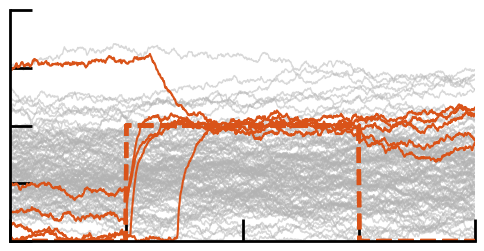

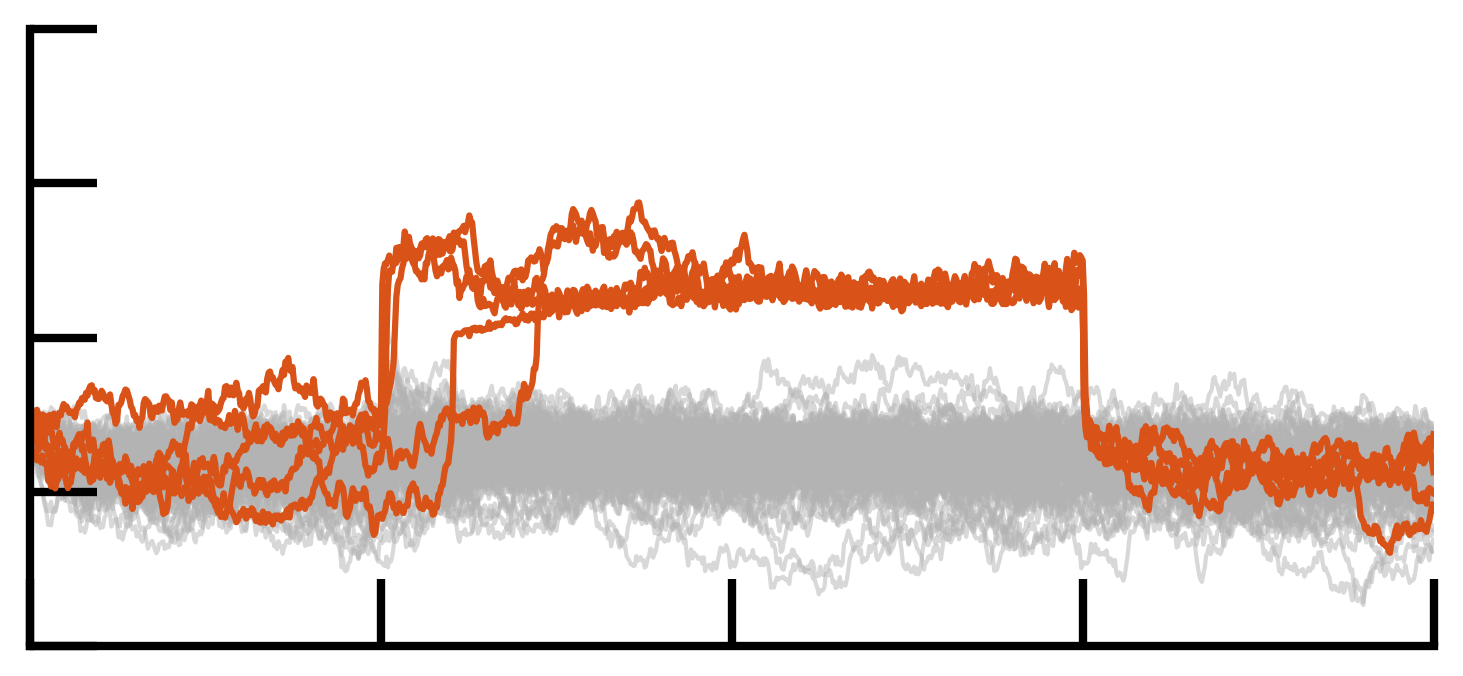

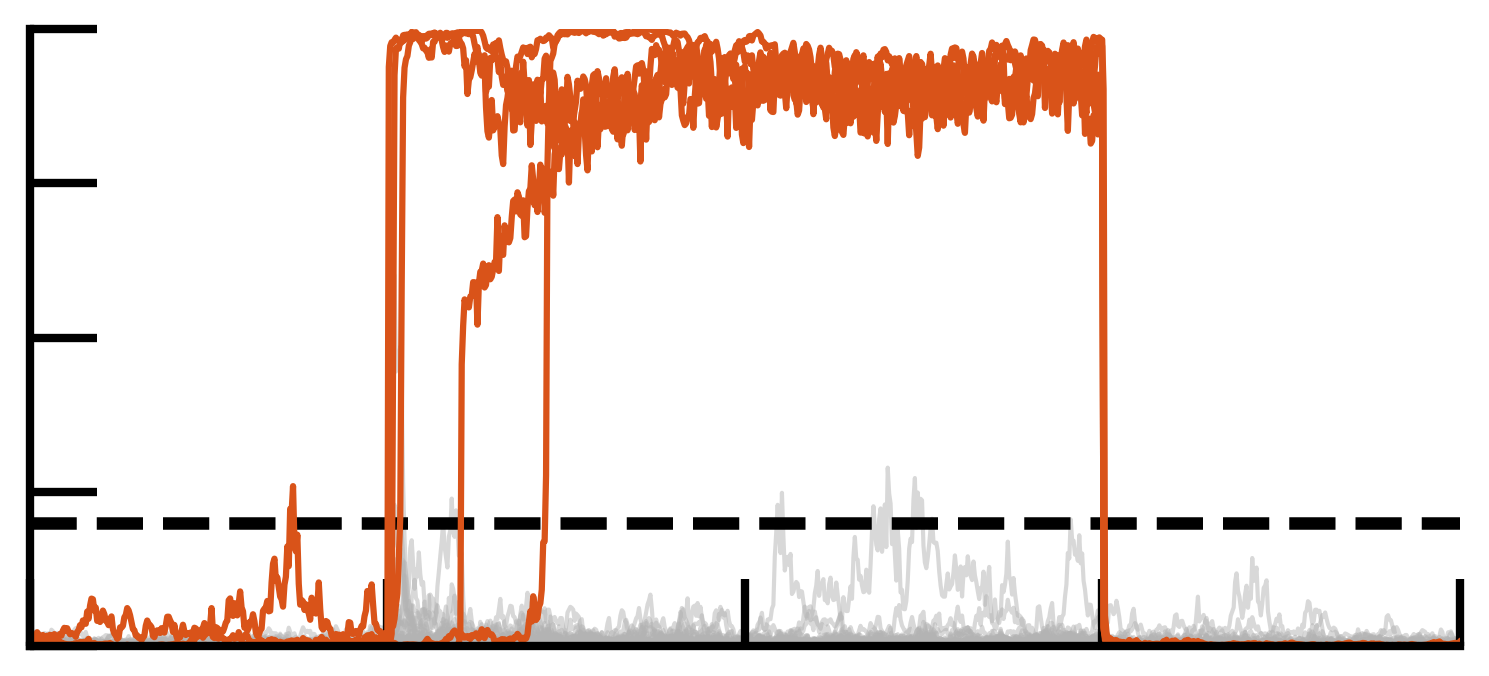

In [7]:
from mirrored_langevin_rnn.utils.visualization import PlotStyle
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels
style = PlotStyle(fig_width=6, fig_height=3)
dp = DynamicsPlotter(C=C, U=U, Theta=Theta, nHigh=num_high, dt=dt, sample_rate=sample_rate, cTrue=c_true,
                     style=style, present_color=separated_color)

fig, ax = dp.plot_concentration()
# hide_labels(ax)
ax.set_ylim([0, 80])
ax.tick_params(
    which='both',
    direction='in',
    length=16,
    width=2,
    labelsize=24,
    pad=10
)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([0, "", 0.5, "", 1])
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_yticklabels([0, "", 40, "", 80])
hide_labels(ax=ax) if hide_label else None
fig.savefig(output_dir /
            f"slam_dyn_concentration_{sensing_matrix_type}.svg", bbox_inches='tight')

# Plot presence
fig, ax = dp.plot_presence()
# hide_labels(ax)
ax.set_ylim([-15, 5])
ax.tick_params(
    which='both',
    direction='in',
    length=16,
    width=2,
    labelsize=24,
    pad=10
)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([0, "", 0.5, "", 1])
if sensing_matrix_type == "dense_gamma":
    ax.set_yticks([-15, -10, -5, 0, 5])
    ax.set_yticklabels([-15, "", -5, "", 5])
else:
    ax.set_yticks([-16, -8, 0, 8, 16])
    ax.set_yticklabels([-16, "", 0, "", 16])
hide_labels(ax=ax) if hide_label else None
fig.savefig(output_dir /
            f"slam_dyn_presence_{sensing_matrix_type}.svg", bbox_inches='tight')

# Plot probability
fig, ax = dp.plot_probability()
# hide_labels(ax)
ax.set_ylim([0, 1])
ax.tick_params(
    which='both',
    direction='in',
    length=16,
    width=2,
    labelsize=24,
    pad=10
)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([0, "", 0.5, "", 1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels([0, "", 0.5, "", 1])
hide_labels(ax=ax) if hide_label else None
fig.savefig(output_dir /
            f"slam_dyn_probability_{sensing_matrix_type}.svg", bbox_inches='tight')

# SLAM circuit implementation


In [8]:
data_path = data_dir / f"simulation_slam_circuit_{sensing_matrix_type}.npz"
data = np.load(data_path)
print(data.files)
C = data['C']
Theta = data['Theta'] if 'Theta' in data else None
U = data['U'] if 'U' in data else None
c_true = data['c_true'] if 'c_true' in data else None
dt = float(data['dt'])
sample_rate = int(data['sample_rate'])
num_high = int(data['num_high'])
print(sample_rate)

['C', 'Theta', 'c_true', 'p_true', 'dt', 'sample_rate', 'num_high', 'num_low', 'U']
100


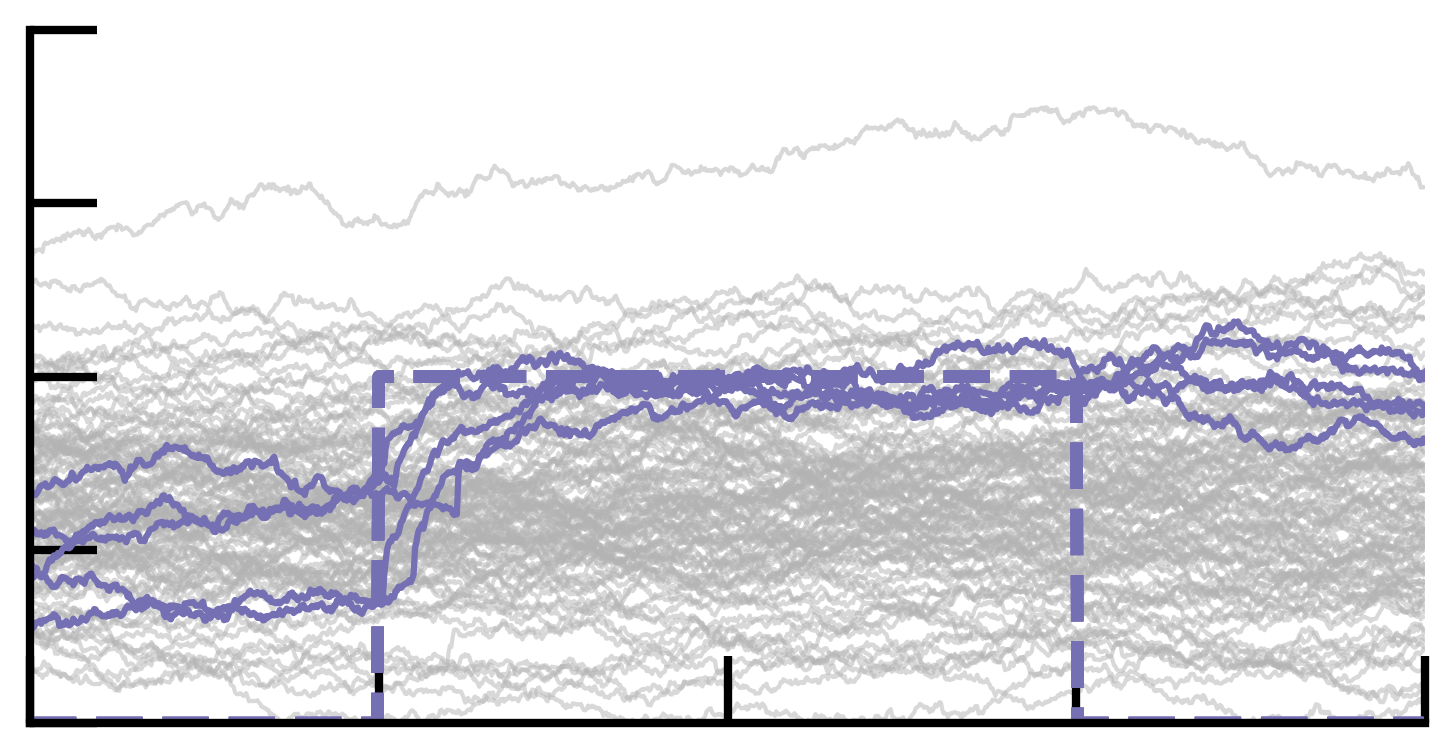

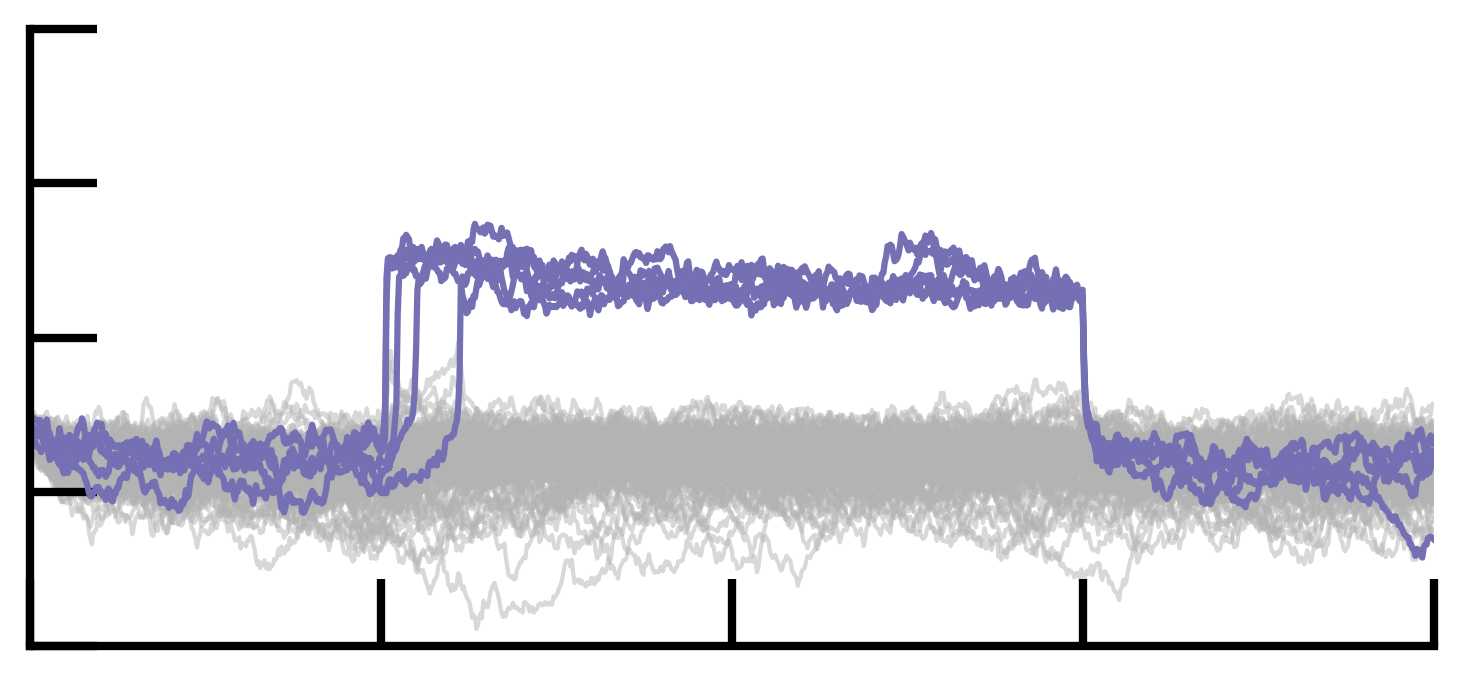

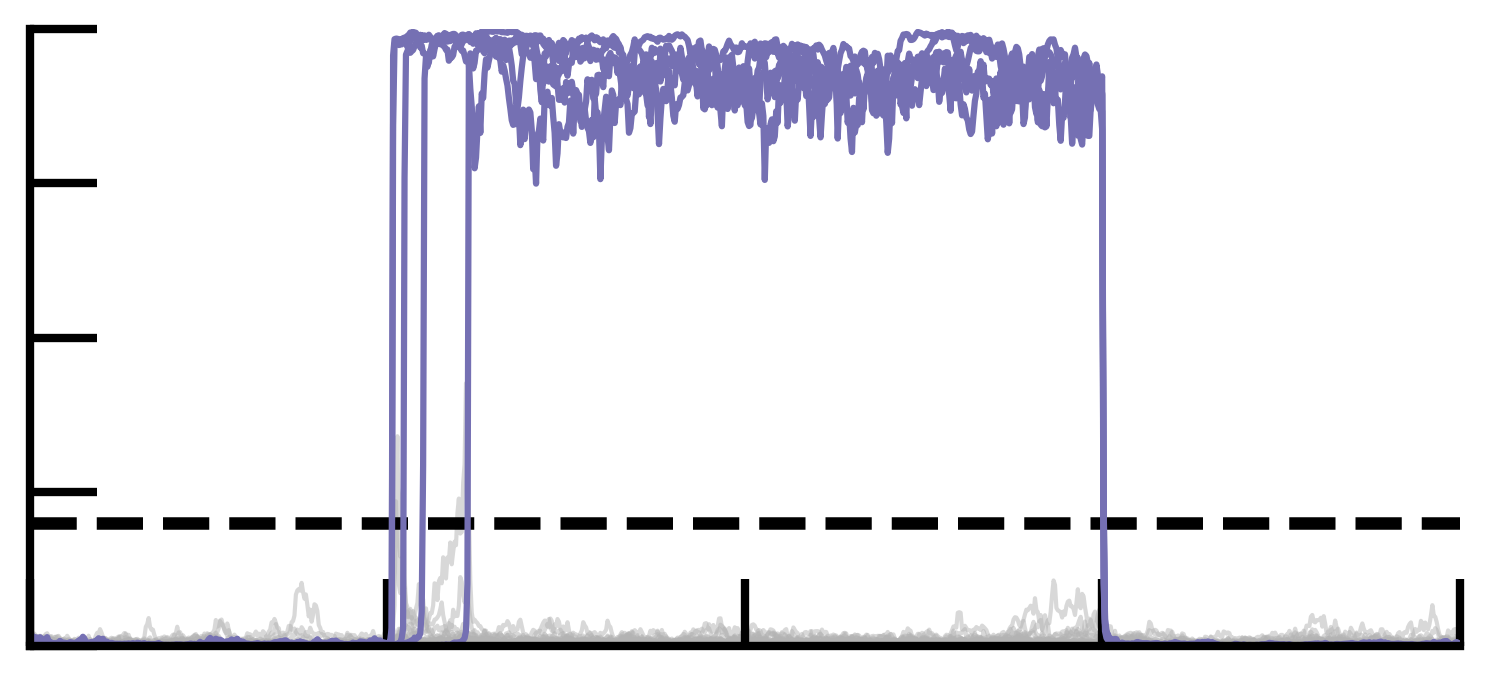

In [9]:
from mirrored_langevin_rnn.utils.visualization import PlotStyle
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels
# style = PlotStyle(fig_width=6, fig_height=3)
# circuit_color = '#E15739'

dp = DynamicsPlotter(C=C, U=U, Theta=Theta, nHigh=num_high, dt=dt, sample_rate=sample_rate, cTrue=c_true,
                     style=style, present_color=circuit_color, threshold_color=circuit_color)

fig, ax = dp.plot_concentration()
# hide_labels(ax)
ax.set_ylim([0, 80])
ax.tick_params(
    which='both',
    direction='in',
    length=16,
    width=2,
    labelsize=24,
    pad=10
)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([0, "", 0.5, "", 1])
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_yticklabels([0, "", 40, "", 80])
hide_labels(ax=ax) if hide_label else None
fig.savefig(output_dir /
            f"slam_circuit_dyn_concentration_{sensing_matrix_type}.svg", bbox_inches='tight')

# Plot presence
fig, ax = dp.plot_presence()
# hide_labels(ax)
ax.set_ylim([-15, 5])
ax.tick_params(
    which='both',
    direction='in',
    length=16,
    width=2,
    labelsize=24,
    pad=10
)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([0, "", 0.5, "", 1])
if sensing_matrix_type == "dense_gamma":
    ax.set_yticks([-15, -10, -5, 0, 5])
    ax.set_yticklabels([-15, "", -5, "", 5])
else:
    ax.set_yticks([-16, -8, 0, 8, 16])
    ax.set_yticklabels([-16, "", 0, "", 16])
hide_labels(ax=ax) if hide_labels else None
fig.savefig(output_dir /
            f"slam_circuit_dyn_presence_{sensing_matrix_type}.svg", bbox_inches='tight')

# Plot probability
fig, ax = dp.plot_probability()
# hide_labels(ax)
ax.set_ylim([0, 1])
ax.tick_params(
    which='both',
    direction='in',
    length=16,
    width=2,
    labelsize=24,
    pad=10
)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([0, "", 0.5, "", 1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels([0, "", 0.5, "", 1])
hide_labels(ax=ax) if hide_label else None
fig.savefig(output_dir /
            f"slam_circuit_dyn_probability_{sensing_matrix_type}.svg", bbox_inches='tight')

# Non-separated


In [10]:
data_path = data_dir / f"simulation_poisson_{sensing_matrix_type}.npz"
data = np.load(data_path)
print(data.files)
C = data['C']
Theta = data['Theta'] if 'Theta' in data else None
U = data['U'] if 'U' in data else None
c_true = data['c_true'] if 'c_true' in data else None
dt = float(data['dt'])
sample_rate = int(data['sample_rate'])
num_high = int(data['num_high'])
print(sample_rate)

['C', 'c_true', 'p_true', 'dt', 'sample_rate', 'num_high', 'num_low']
100


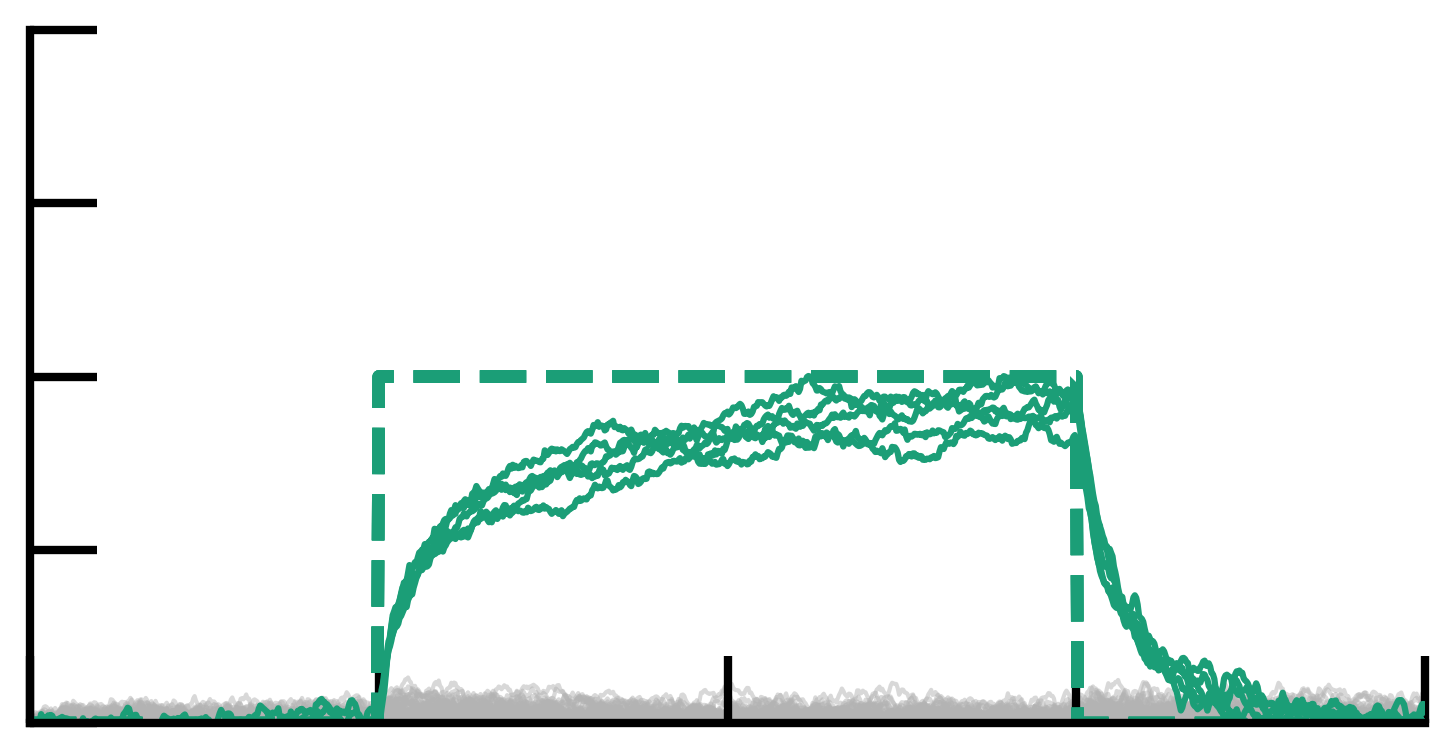

In [11]:
from mirrored_langevin_rnn.utils.visualization.styling import apply_style


dp = DynamicsPlotter(C=C, U=U, Theta=Theta, nHigh=num_high,
                     dt=dt, sample_rate=sample_rate, cTrue=c_true,
                     present_color=non_separated_color,
                     style=style)

fig, ax = dp.plot_concentration()
ax.set_ylim([0, 50])
# hide_labels(ax)
ax.tick_params(
    which='both',
    direction='in',
    length=16,
    width=2,
    labelsize=24,
    pad=10
)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([0, "", 0.5, "", 1])
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_yticklabels([0, "", 40, "", 80])
hide_labels(ax=ax) if hide_label else None
fig.savefig(output_dir/f"poisson_dyn_concentration_{sensing_matrix_type}.svg",
            bbox_inches='tight')